# Feature Selction 개요

데이터의 feature selection 에는 크게 세가지 방법이 있다.

첫 번째는 Filter method다. Filter method는 모델에 적용하기 전에 변수를 걸러낸다. 상관계수와 같은 통계적 지표를 사용하여 순위를 매기고, 영향력이 적은 변수는 제외하는 방식으로 작동한다. Filter method는 학습 전에 작동하므로 시간을 아낄 수 있고, 다른 방법에 비해 과적합을 예방할 수 있는 특징이 있다. 하지만, 변수 간의 관계를 고려하지 않기 때문에, 중복된 특징을 가지는 변수를 선택할 수 있다는 단점이 있다. 상관분석, 카이제곱 검정, 웰치 t 검정 등이 이 방식에 속한다.

다음은 Wrapper method다. Wrapper method는 가장 이상적인 변수의 조합을 찾는 방식이다. 여러 변수가 존재할 때, 그 변수들의 조합을 다르게 하면서 학습을 진행하는 것이다. 완료된 모델 중 점수가 가장 높은 조합을 선택한다. 정확도를 기준으로 했다면, 가장 높은 정확도를 보인 변수조합을 얻을 수 있다는 장점이 있지만, 각 변수조합을 학습해야 하기 때문에 시간이 오래 걸리고, 과적합의 위험성이 증가한다는 단점이 있다. Forward selection, backward elimination, stepwise selection 등이 속한다.

마지막은 Embedded method다. Embedded method는 모델의 학습 및 생성 과정에서 최적의 변수를 선택한다. Wrapper method는 모든 조합의 학습을 마친 결과를 비교하는데 비해, Embedded method는 학습 과정에서 최적화된 변수를 선택한다는 점에서 차이가 있다. 위의 두 방식의 장점을 결합하고자 하는 것으로, 보통 변수에 규제를 가하는 방식이 사용된다. 대표적으로 LASSO와 Ridge Regression이 Embedded method에 속한다.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Regression dataset 형성하기
X, y = make_regression(n_samples=2000, # sample 의 수는 2000개
                       n_features=20, # x 변수는 20개
                       n_informative=4, # 그중 y 변수와 관련되는 변수는 4개  
                       noise = 3       # nosie 
                      ,effective_rank=15 #  x 변수중 서로 독립인 수 (5개는 서로 관련)
                      ,tail_strength=0.3 # 관련된 변수의 관련성
                      ,random_state=0) # random state 고정
X = pd.DataFrame(X,columns=list('abcdefghijklmnopqrst'))
X[['a','d','f','j','m']]=X[['a','d','f','j','m']]*-1
display(X.head() , y)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t
0,0.025224,0.008405,-0.007318,-0.014080,-0.005149,0.018893,-0.026569,-0.004704,0.009057,-0.035768,0.010863,-0.006530,0.047138,0.004961,0.004522,-0.005009,-0.027447,-0.001734,0.006053,0.013745
1,0.018527,-0.010115,-0.013525,0.022476,0.000339,0.011206,0.029831,-0.003399,0.016128,0.008815,-0.006252,-0.010808,0.009921,-0.011789,-0.015326,-0.009772,0.022081,-0.037687,-0.018858,-0.001656
2,0.009434,0.004527,0.002136,0.000032,-0.019491,0.015520,-0.000625,0.064615,0.007078,0.020132,-0.011781,-0.013673,-0.014437,-0.023573,0.003888,0.009437,-0.018127,0.020044,0.008744,0.001688
3,0.017542,0.007550,0.016328,0.012456,0.003847,-0.000961,0.012238,-0.009797,-0.018079,-0.007888,0.001194,0.004952,-0.011066,-0.025502,-0.006265,-0.015814,-0.011684,-0.034066,-0.026690,-0.005797
4,-0.007018,0.000933,-0.011095,0.004866,0.023834,-0.014207,-0.022294,0.006455,-0.001231,0.021549,0.001083,0.023227,-0.032466,0.022926,-0.021975,-0.001706,-0.009895,-0.002055,-0.007035,-0.012011


array([ 4.7989583 ,  2.60992309,  3.15534149, ..., -0.88908075,
       -5.57811736,  3.9804761 ])

In [4]:
# Classification dataset 형성하기
Xc, yc = make_classification(n_samples=300,  # 표본 데이터의 수, 디폴트 100
                             n_features=15,  # 독립 변수의 수, 디폴트 20
                             n_informative=4,  # 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
                             n_redundant=2, # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
                             n_clusters_per_class=1, # 클래스 당 클러스터의 수, 디폴트 2
                             n_classes=3, # 종속 변수의 클래스 수, 디폴트 2
                             random_state=0)
Xc = pd.DataFrame(Xc,columns=list('abcdefghijklmno'))
display(Xc.head() , yc)

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,-1.158215,-0.675833,0.448492,-0.842543,2.232889,0.147461,-0.213919,0.532873,-0.604045,-0.332821,-1.376090,-1.083270,-0.854913,-1.608711,0.649953
1,-1.666340,-0.182845,-0.846050,-0.179452,0.382073,-1.105616,1.948512,2.158387,-0.362987,0.977652,0.399624,-0.552694,-0.183022,-1.890676,-1.391946
2,0.788402,1.373856,-0.429065,0.891064,0.963987,0.778797,-0.854284,-1.473552,0.164241,-0.486102,-0.501906,1.652401,0.881583,-0.543788,-0.879982
3,-2.101311,-1.187411,0.865645,-1.304290,-0.874008,-0.389177,1.050448,1.573958,-0.112665,1.664537,-0.085852,-0.542334,0.328850,0.397289,-1.161907
4,0.995946,0.746935,0.181979,1.402588,-1.089835,1.477644,-1.784294,-2.598543,1.996787,-0.903922,0.902545,2.543335,0.220129,-0.797048,-1.132361


array([0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0,
       1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2,
       2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2,
       0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1])

In [5]:
# classification data 2번째 경우 형성하기
from sklearn.datasets import load_iris
Xdata, ydata = load_iris(return_X_y=True)
Xi=pd.DataFrame(Xdata,columns=['x1','x2','x3','x4'])
yi=pd.DataFrame(ydata,columns=['y'])
data=pd.concat([Xi,yi],axis=1)

In [6]:
data.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


왜 feature selection 과정이 필요한가 ?
- feature가 너무 많으면 분명 예측력은 올라가겠지만 overfitting의 문제가 일어날 수 있기 때문이다.
- 설명할 모델은 간결할수록 좋기 때문
- computational / intepretion 의 한계 때문

# correlation with X

 - X 의 어떤 변수끼리 큰 cor 이 존재한다면, 그 경우 두 변수는 서로 관련이 있다는 것이고, 하나는 없애도 될 것이다!
 - 기준은 데이터의 크기, 성질 등 마다 달라서 찾아보기 바란다.

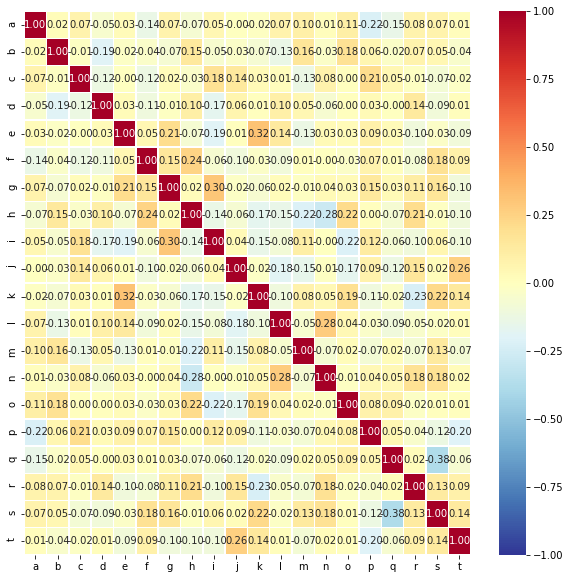

In [15]:
plt.figure(figsize=(10,10))
# plt.figure 는 내가 그릴 그림의 크기를 결정한다.
sns.heatmap(data = X.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu_r',vmin=-1,vmax=1)
#내부 속성중 annot 은 annotation. 각 셀의 값을 표시할지 결정하는 것이고, 
#fmt 는  annot=True 인 경우에, 숫자 표시를 어떻게 할지에요. 
#(.2f 는  소수 두번째자리까지 표시하라는 의미입니다.)
#cmap 은 색상을 어떻게 할지. 이때에 - ~ + 까지 있으므로 단일 BLues 보다는 두가지색을 혼용하는게 좋다.
#linewidths 는 각 셀을 구분짓는 하얀 선의 굵기
#vmin=-1,vmax=1 (cmap 범위를 설정해주는게 좋다.)

# correlation with y 

x1 와 y 가 큰 선형관계가 있다면, 그 둘의 pearson 상관관계가 높게 나올것이다.

즉 이를 이용해, pearson correlation 이 높게 나온 상위 n 개의 변수를 select 하는 아이디어

In [7]:
def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [8]:
cor_support, cor_feature = cor_selector(X, y, 4)
print(str(len(cor_feature)), 'selected features')

4 selected features


In [9]:
cor_feature

['g', 'j', 'i', 'p']

# recursive feature elimination (RFE)

Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식이다.

In [65]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR 

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=4, step=1)
# estimator : coef 값을 제공하거나, feature importance 를 제공하는 supervised model
# estimator 에 어떤 model 을 쓰느냐에 따라서 importance 가 달라질것이므로 주의!
# n_features_to_select : 몇개의 feature 을 선택할지
# step : 한번의 iteration 에서 몇개의 변수를 없앨지
selector = selector.fit(X, y)

In [66]:
X.columns[selector.support_] # X 들중 어느게 선택되었는지

Index(['g', 'i', 'j', 'p'], dtype='object')

# VarianceThreshold()

원래 예측모형에서 중요한 특징데이터란 종속데이터와의 상관관계가 크고 예측에 도움이 되는 데이터를 말한다. 하지만 상관관계 계산에 앞서 특징데이터의 값 자체가 표본에 따라 그다지 변하지 않는다면 종속데이터 예측에도 도움이 되지 않을 가능성이 높다. 따라서 표본 변화에 따른 데이터 값의 변화 즉, 분산이 기준치보다 낮은 특징 데이터는 사용하지 않는 방법이 분산에 의한 선택 방법이다. 예를 들어 종속데이터와 특징데이터가 모두 0 또는 1 두가지 값만 가지는데 종속데이터는 0과 1이 균형을 이루는데 반해 특징데이터가 대부분(예를 들어 90%)의 값이 0이라면 이 특징데이터는 분류에 도움이 되지 않을 가능성이 높다.

The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.
(즉 X_input 끼리의 상관관계 , 또한 y 와의 상관관계를 고려하지 않고 하나의 데이터에 대해서만 고려하기떄문에 약점이 있다.)

그리고 분산은 scale 의 영향을 받기떄문에 무조건! scaling 을 하고 나서 분석해야 한다!

사실 이 분석은 분산이 0 인 경우 (즉 그냥 constant인 특성) 를 제외시키려고 쓴다. 그 외의 방법은 잘 쓰지 않음

In [17]:
# 스케일링이 되었다고 하자.
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0)
# VAR 의 하안값. 0 를 넘어야 의미있는값으로 쳐줄것이다.

In [18]:
selector.fit(X,y) # 변환하기

VarianceThreshold(threshold=0)

In [19]:
X.columns[selector.get_support()] # 어떤 변수를 선택했는지.

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't'],
      dtype='object')

constant 변수는 없는듯 하다 ^^

#  Univariate feature selection

단일 변수 선택법은 각각의 독립변수를 하나만 사용한 예측모형의 성능을 이용하여 가장 분류성능 혹은 상관관계가 높은 변수만 선택하는 방법이다.

## chi-square test[classification]

x 와 y 의 관계를 알아보고싶다고 하자. 그런데 이 떄에 x1 변수가 y 와 chi-squre test 에 의해 독립이라고 하자. 그러면 이 때에는 x1 변수는 의미가 없어진다. (y 와 독립이므로) 그러므로 제거할 수 있다.

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=3).fit(Xi,yi)
# 상위 3개의 feature 를 선택하고. 그 기준은 chi2 test 를 통해서 y와 dependent 하다고 생각되어지는 상위 3개의 값이다.

In [28]:
selector.pvalues_ 
# chi2 test 는 H0 : 두 변수가 통계적으로 독립
# P-value 를 보면 2번째 col의 값은 통계적으로 독립으로 보인다. 즉 의미가 없어보인다

array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15])

In [29]:
Xi.columns[selector.get_support()] 
# 2번째 col 이 제거된 모습을 볼 수 있다.

Index(['x1', 'x3', 'x4'], dtype='object')

## f_classif [classification]

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

즉 one way anova 를 y변수의 label에 맞추어 1개의 x변수에 대해 group 을 나눈다. 그 이후 그 그룹들의 평균차이를 one way anova 비교해본다. 

이떄에 x1 변수가 y변수가 다름에도 평균차이는 무의미하다고 결론이 나온다면, 이는 x1 변수는 큰 information 을 가지지 않는다고 판단할 수 있을것이다.

f value 가 높은순서대로(평균간 차이가 유의미한지) 선택하는것이다. 

In [30]:
Xc.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,-1.158215,-0.675833,0.448492,-0.842543,2.232889,0.147461,-0.213919,0.532873,-0.604045,-0.332821,-1.376090,-1.083270,-0.854913,-1.608711,0.649953
1,-1.666340,-0.182845,-0.846050,-0.179452,0.382073,-1.105616,1.948512,2.158387,-0.362987,0.977652,0.399624,-0.552694,-0.183022,-1.890676,-1.391946
2,0.788402,1.373856,-0.429065,0.891064,0.963987,0.778797,-0.854284,-1.473552,0.164241,-0.486102,-0.501906,1.652401,0.881583,-0.543788,-0.879982
3,-2.101311,-1.187411,0.865645,-1.304290,-0.874008,-0.389177,1.050448,1.573958,-0.112665,1.664537,-0.085852,-0.542334,0.328850,0.397289,-1.161907
4,0.995946,0.746935,0.181979,1.402588,-1.089835,1.477644,-1.784294,-2.598543,1.996787,-0.903922,0.902545,2.543335,0.220129,-0.797048,-1.132361


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=3).fit(Xi,yi)

C:\Users\goran\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [32]:
selector.pvalues_ 

array([1.66966919e-31, 4.49201713e-17, 2.85677661e-91, 4.16944584e-85])

In [33]:
Xi.columns[selector.get_support()]

Index(['x1', 'x3', 'x4'], dtype='object')

### note

In [34]:
data.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('x1 ~ C(y)', data).fit() 
# C(y) 는 y 의 categorical 을 토대로 x1 의 value 들을 분리하겠다는 의미이다.
# 여기에서는 y 가 0,1,2 였으므로 0,1,2 의 y 값을 가지는 x1 들을 그룹별로 묶은뒤, 세 그룹(y=0,1,2) 의 평균을 비교하겠다는뜻.
aov_table = sm.stats.anova_lm(model)
aov_table

ModuleNotFoundError: No module named 'statsmodels'

In [36]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


이때의 p-value 가 우리가 했던 위의 결과와 일치하는 것을 볼 수 있다.

## f_regression[regression]

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.

즉 linear regression 을 x,y 로 simple linear regression 을 해가면서 f-statsitsic(model 의 유의성) 가 높은 변수를 선택하는 것이다.

In [366]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
selector = SelectKBest(f_regression, k=4).fit(X,y)

In [367]:
selector.pvalues_ # 각 변수를 y 하나와 simple linear regression 을 해 보아서, 나오는 p -value 값.

array([1.82119097e-05, 9.48237912e-01, 5.37710518e-05, 7.76586890e-02,
       1.08502146e-01, 7.80350641e-04, 1.77999740e-10, 1.00427902e-01,
       1.78573910e-46, 5.05555201e-11, 4.33840931e-03, 1.97273989e-01,
       8.27874582e-03, 5.70334926e-01, 2.10854262e-01, 1.21516958e-59,
       8.56352279e-01, 8.44182484e-02, 5.01769661e-01, 1.07776496e-09])

In [368]:
X.columns[selector.get_support()]

Index(['g', 'i', 'j', 'p'], dtype='object')

### note

In [369]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X[['a']], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
import statsmodels.api as sm
model = sm.OLS(y,X[['a']])
result = model.fit()

In [371]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              18.47
Date:                Wed, 01 Jul 2020   Prob (F-statistic):                    1.81e-05
Time:                        19:45:48   Log-Likelihood:                         -5242.3
No. Observations:                2000   AIC:                                  1.049e+04
Df Residuals:                    1999   BIC:                                  1.049e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

이 떄에 OLS(Simple linear regression) 를 이용해, X와 y 변수에 대해 모델의 유의성 검정을 했을떄의 p value 값이 일치하는것을 볼 수 있다.

# mutual_info_classif

Mutual Information은 두 random variable들이 얼마나 mutual dependence 한 지를 measure 하는 방법을 의미한다.
즉 간단하게 x,y가 독립이면 p(x,y)=p(x)p(y)로 주어지고, 아니면 먼가 값이 나올 것이다. 
그래서 만약 independent 하면 0의 값을 얻게 되고, 상호 의존성이 크다면, 값이 나오게 될 것이다.
개인적으로 이 방법이 correlation을 측정하는 방법론보다 더 일반화된 방법이라서 더 선호한다.



Correlation은 X,y의 선형 관계(Pearson's correlation) 또는 monotonic relationship(Spearman's correlation)을 측정한다.
Mutual Information 같은 경우, 일반적이며 X를 관찰한 후 Y의 불확실성 감소를 측정한다. 이것은 결합 밀도 함수와 개별 밀도 함수의 곱 같이 KL dIvergence를 의미한다. 따라서 MI는 비 단조 관계나 더 복잡한 관계까지도 측정이 가능하다는 것이다.

이 라이브러리를 사용하려면, 데이터의 결측이 존재해서는 안 되는 것도 잊지 말자.

In [372]:
from sklearn.feature_selection import mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=3).fit(Xi,yi)

In [373]:
selector.scores_

array([0.48028227, 0.22914279, 0.97777502, 0.98139002])

In [375]:
Xi.columns[selector.get_support()]

Index(['x1', 'x3', 'x4'], dtype='object')

# mutual_info_regression

In [379]:
from sklearn.feature_selection import mutual_info_regression
sel_mutual = SelectKBest(mutual_info_regression, k=4).fit(X,y)

In [380]:
sel_mutual.scores_

array([0.        , 0.01384239, 0.        , 0.00129474, 0.02934124,
       0.04244648, 0.        , 0.        , 0.05829675, 0.01834601,
       0.        , 0.        , 0.01848179, 0.        , 0.        ,
       0.08219072, 0.        , 0.01046264, 0.00838187, 0.00202267])

In [381]:
X.columns[sel_mutual.get_support()]

Index(['e', 'f', 'i', 'p'], dtype='object')

# Principle Component Analysis.

In [80]:
# 먼저 정규화 부터 시켜야한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fit_Xc = scaler.fit_transform(Xc)

In [82]:
from sklearn.decomposition import PCA
pca = PCA() 
pca.fit(fit_Xc)
print(pca.explained_variance_ratio_) # 설명되는 variance 의 비율

[1.66034098e-01 1.55855598e-01 8.24438492e-02 7.86266349e-02
 7.81187104e-02 6.74600182e-02 6.59665007e-02 6.32770277e-02
 6.01593509e-02 5.76528025e-02 5.23842734e-02 4.83241109e-02
 2.36970255e-02 3.33169980e-33 2.01731778e-33]


In [83]:
pca.components_[0] # 최대의 var 를 만드는 단위기저백터

array([-0.35865771,  0.081161  ,  0.0425336 , -0.07538683,  0.05393312,
       -0.39231067,  0.55634669,  0.55266087, -0.07751012, -0.01393315,
       -0.06911959, -0.16740399, -0.00401544,  0.08334267, -0.1988654 ])

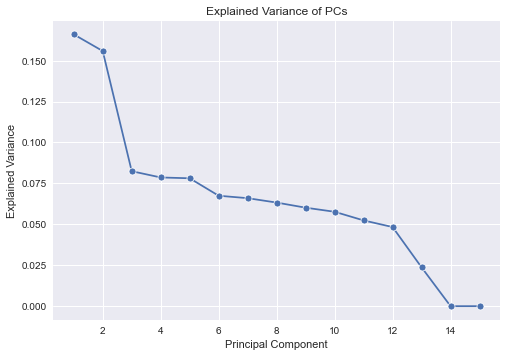

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(fit_Xc)
plt.style.use('seaborn')
lambdas = pca.explained_variance_ratio_
sns.lineplot(x = range(1, fit_Xc.shape[1]+1),y  = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of PCs')
plt.grid(True)
plt.show()

In [86]:
lambdas_cumsum = np.cumsum(lambdas)

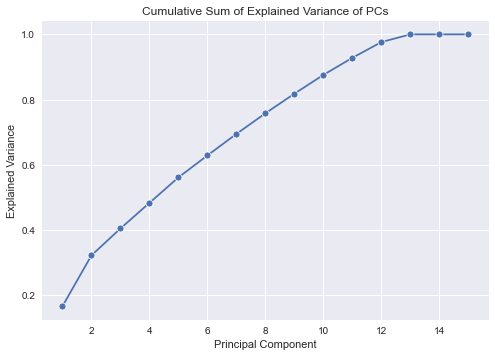

In [91]:
sns.lineplot(x = range(1, fit_Xc.shape[1]+1),y  = lambdas_cumsum[0:], marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Cumulative Sum of Explained Variance of PCs')
plt.grid(True)
plt.show()

<BarContainer object of 15 artists>

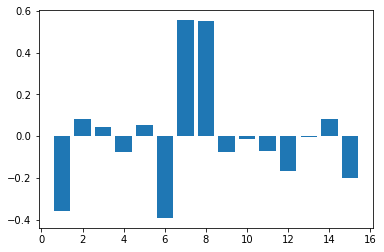

In [86]:
plt.bar([x+1 for x in range(len(pca.components_[0]))], pca.components_[0]) 
# 6,7,8 번쨰의 값이 큰 영향을 끼치는듯... ?

# Factor Analysis

In [25]:
import seaborn as sns
from factor_analyzer import FactorAnalyzer

In [43]:
X.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't'],
      dtype='object')

다양한 모델 / lasso , random forest 등에서 나오는 feature importance 로 결정하자.

In [46]:
# 먼저 정규화 부터 시켜야한다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fit_X = scaler.fit_transform(X)

In [52]:
fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
fa.fit(fit_X)

FactorAnalyzer(method='ml', n_factors=5, rotation_kwargs={})

In [53]:
result=pd.DataFrame(fa.loadings_, index= X.columns)

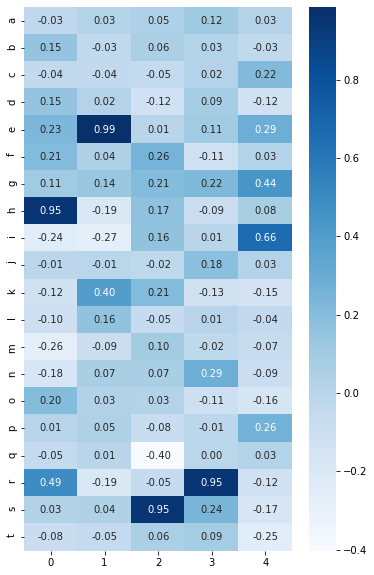

In [54]:
plt.figure(figsize=(6,10))
sns.heatmap(result, cmap="Blues", annot=True, fmt='.2f')

In [56]:
# 음... 그런데 크게 묶이지 않는 이유는 우리가 데이터 만들떄에 어쩔수없이 하나의 변수가 큰 역활을 하도록 생성해서 어쩔 수 없는듯 하다.

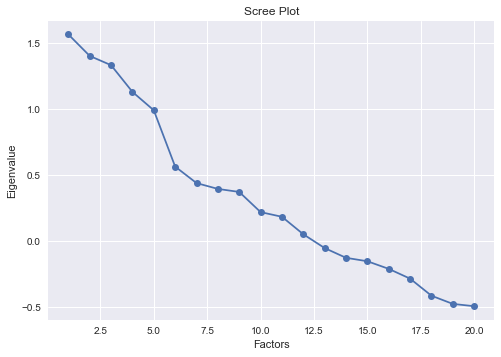

In [93]:
ev, v = fa.get_eigenvalues()
plt.plot(range(1,X.shape[1]+1),v, 'o-') # factor eigen values
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.style.use('seaborn')